# Perfil de intensidad para una imagen en grises

In [35]:
# Importamos las librerias necesarias
from pylab import * 
import numpy as np
import pandas as pd
from skimage.exposure import histogram as imhist
from skimage.color import rgb2gray 

# Analisis para una sola imagen (130°)

In [36]:
# Cargamos imagen, se convierte a matriz
image = imread('../intensidad/B13.png')
# Utilizamos shape para conocer las propiedades de nuestra matriz
print(image.shape)

(1024, 1280, 4)


En este caso la imagen tiene una resolución de 1024 x 1280 pixeles y cuenta con 4 dimensiones, tres de color RGB y una transparente.


In [37]:
# Nos aseguramos que la imagen sea un array de NumPy
image = np.array(image)

# Verificamos si la imagen tiene 4 canales
if image.shape[-1] == 4:
    # Elimina el canal alfa
    image = image[..., :3]

In [38]:
# Convertimos la imagen a escala de grises
image = rgb2gray(image)

In [39]:
# Obtenemos los histogramas
hist_image, bins_image = imhist(image)

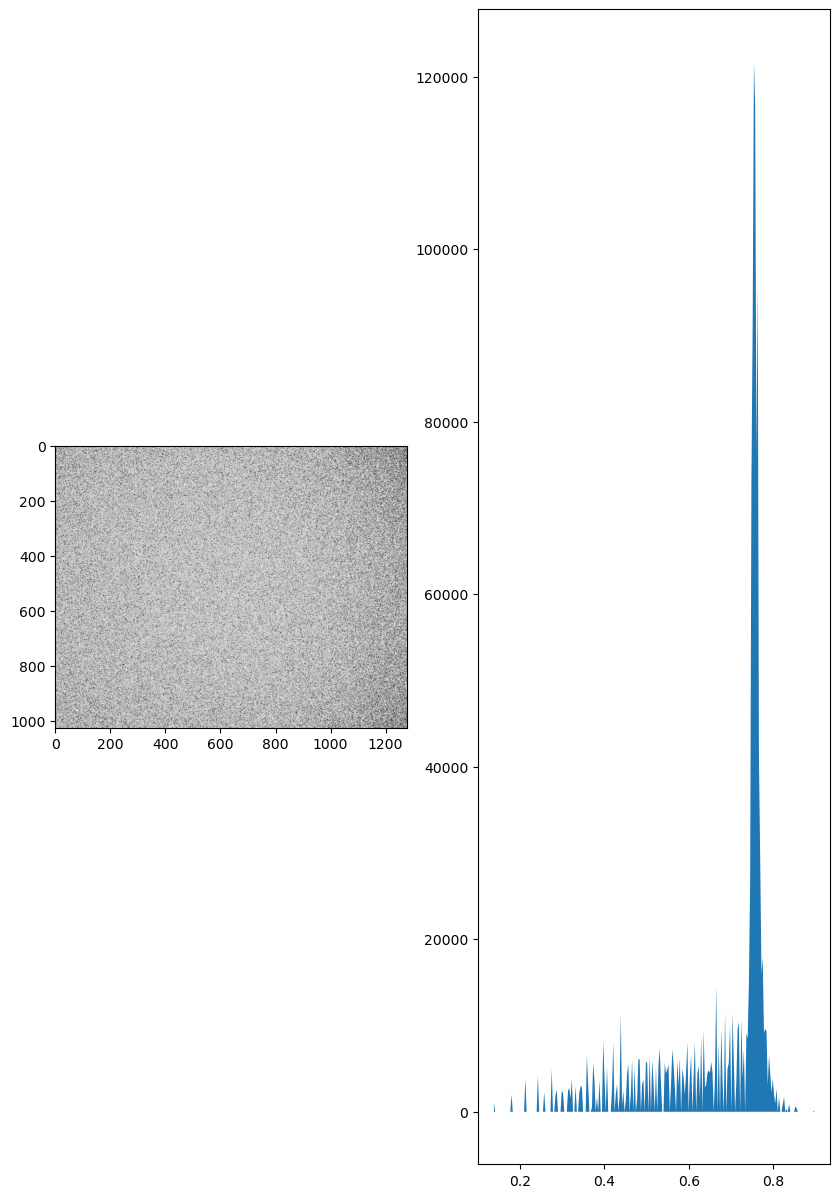

In [40]:
# Visualizamos
_, (image0, hist0), = subplots(1, 2, figsize=(10, 15))

# Original
image0.imshow(image, cmap="gray")
hist0.fill_between(bins_image, hist_image)


In [41]:
# Calculamos el promedio de intensidad
average_intensity = image.mean()

# Encontramos el valor máximo de número de píxeles y su correspondiente intensidad
max_pixel_value = hist_image.max()
max_intensity_value = bins_image[hist_image.argmax()]

print(f'Promedio de intensidad: {average_intensity}')
print(f'Punto máximo en valor de número de píxeles: {max_pixel_value}')
print(f'Máximo de intensidad: {max_intensity_value}')


Promedio de intensidad: 0.6770464777946472
Punto máximo en valor de número de píxeles: 121716
Máximo de intensidad: 0.7542414665222168


# Analisis para todas las imagenes

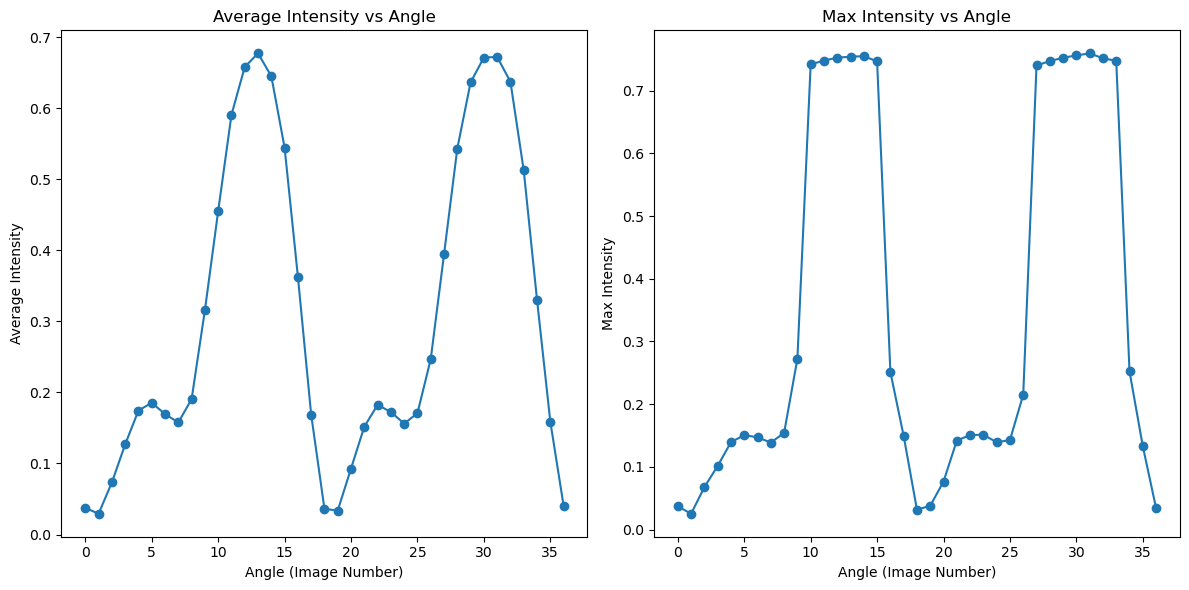

      Image  Average Intensity  Max Pixel Value  Max Intensity
0    B0.png           0.037445           125544       0.036961
1    B1.png           0.029297           185112       0.025238
2    B2.png           0.073343            51143       0.067603
3    B3.png           0.126833            33083       0.101485
4    B4.png           0.174454            32500       0.139293
5    B5.png           0.185336            29019       0.150633
6    B6.png           0.169503            28864       0.147075
7    B7.png           0.157638            30302       0.138786
8    B8.png           0.190467            26420       0.154037
9    B9.png           0.315401            29403       0.272235
10  B10.png           0.455063            41485       0.741923
11  B11.png           0.590501            78045       0.748051
12  B12.png           0.657873           143473       0.752554
13  B13.png           0.677046           121716       0.754241
14  B14.png           0.644987           111126       0

In [42]:
# Lista para almacenar los resultados
results = []

# Recorremos las imágenes desde B0 hasta B36
for i in range(37):
    # Formateamos el nombre de la imagen
    img_path = f'../intensidad/B{i}.png'
    # Cargamos la imagen
    image = imread(img_path)
    
    # Verificamos si la imagen tiene 4 canales y eliminamos el canal alfa si es necesario
    if image.shape[-1] == 4:
        image = image[..., :3]
    
    # Convertimos la imagen a escala de grises
    image = rgb2gray(image)
    
    # Obtenemos el histograma de la imagen
    hist_image, bins_image = imhist(image)
    
    # Calculamos el promedio de intensidad
    average_intensity = image.mean()
    
    # Encontramos el valor máximo de número de píxeles y su correspondiente intensidad
    max_pixel_value = hist_image.max()
    max_intensity_value = bins_image[hist_image.argmax()]
    
    # Guardamos los resultados en la lista
    results.append({
        'Image': f'B{i}.png',
        'Average Intensity': average_intensity,
        'Max Pixel Value': max_pixel_value,
        'Max Intensity': max_intensity_value
    })

# Convertimos los resultados a un DataFrame
df = pd.DataFrame(results)

# Graficamos el promedio de intensidad y el máximo de intensidad
angles = range(37)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(angles, df['Average Intensity'], marker='o')
plt.xlabel('Angle (Image Number)')
plt.ylabel('Average Intensity')
plt.title('Average Intensity vs Angle')

plt.subplot(1, 2, 2)
plt.plot(angles, df['Max Intensity'], marker='o')
plt.xlabel('Angle (Image Number)')
plt.ylabel('Max Intensity')
plt.title('Max Intensity vs Angle')

plt.tight_layout()
plt.show()

# Mostrar el DataFrame
print(df)
